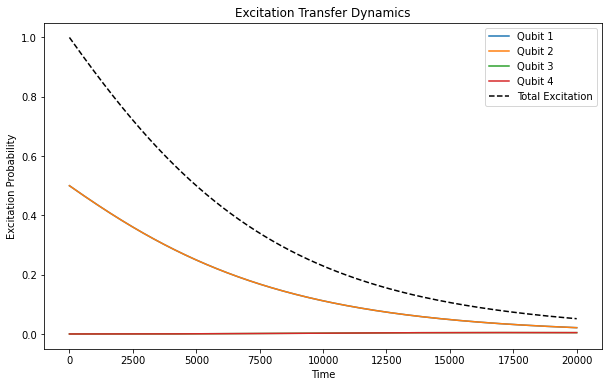

In [72]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 4 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian

    # Approximate non-resonant loss term
    #non_res_loss_term = -0.5j * gamma * sum([sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag() * sm_list[i] * sm_list[j] * sm_list[k]
     #                                            for i in range(num_qubits) for j in range(i) for k in range(j)])

    #non_res_loss_term = -0.5j * gamma * sum([sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag() * sm_list[i] * sm_list[j] * sm_list[k]
    #                                     for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
    #                                     if i != j and i != k and j != k])
    
    #non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] * sm_list[k] * sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag()
    #                                     for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
    #                                     if i != j and i != k and j != k])
    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] * sm_list[k] * sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag()
                                         for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
                                         if i != j and i != k and j != k])


    H = H_qubits + H_field + H_interaction + non_res_loss_term

    return H, a, sm_list

H, a, sm_list = setup_system(omega_q=0.00001, omega_f=0.000000001, g=0.00005, gamma=0.00002)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_1000 + state_0100).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# Time evolution
times = np.linspace(0, 20000, 20000)  # Adjust time values as needed

opts = Options(normalize_output=False)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

$$H = \sum_{i=1}^{N} \omega_{q} \sigma_{+}^{i} \sigma_{-}^{i} + \omega_{f} a^{\dagger} a + g \sum_{i=1}^{N} (\sigma_{+}^{i} a + \sigma_{-}^{i} a^{\dagger}) - \frac{i \gamma}{2} \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} \sum_{k=1, k \neq i, k \neq j}^{N} (\sigma_{-}^{i} \sigma_{-}^{j} \sigma_{-}^{k})(\sigma_{+}^{i} \sigma_{+}^{j} \sigma_{+}^{k})$$

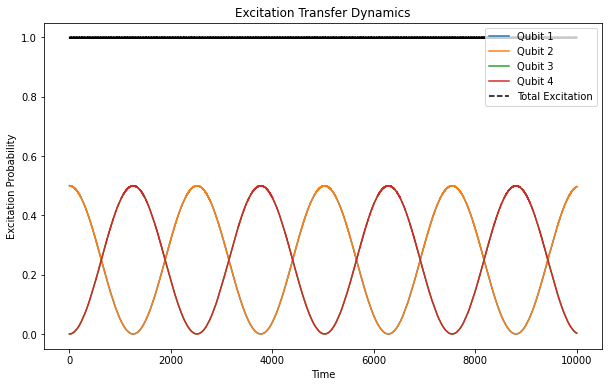

In [41]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 4 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian

    # Approximate non-resonant loss term
    #non_res_loss_term = -0.5j * gamma * sum([sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag() * sm_list[i] * sm_list[j] * sm_list[k]
     #                                            for i in range(num_qubits) for j in range(i) for k in range(j)])

    #non_res_loss_term = -0.5j * gamma * sum([sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag() * sm_list[i] * sm_list[j] * sm_list[k]
    #                                     for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
    #                                     if i != j and i != k and j != k])
    
    #non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] * sm_list[k] * sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag()
    #                                     for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
    #                                     if i != j and i != k and j != k])
    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] * sm_list[k] * sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag()
                                         for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
                                         if i != j and i != k and j != k])


    H = H_qubits + H_field + H_interaction #+ non_res_loss_term

    return H, a, sm_list

H, a, sm_list = setup_system(omega_q=5.0, omega_f=1.0, g=0.05, gamma=0.00002)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_1000 + state_0100).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# Time evolution
times = np.linspace(0, 10000, 20000)  # Adjust time values as needed

opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

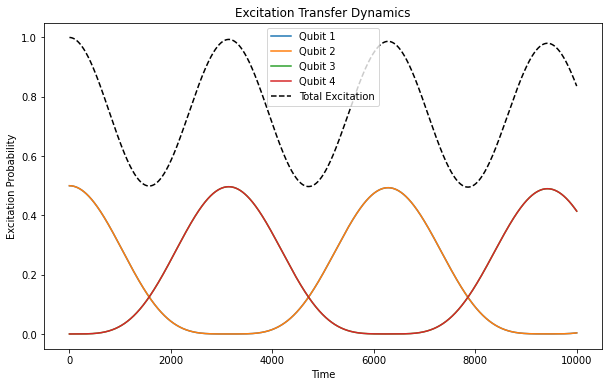

In [70]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 4 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian

    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] * sm_list[k] * 
                                         sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag()
                                         for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
                                         if i != j and i != k and j != k])


    H = H_qubits + H_field + H_interaction + non_res_loss_term

    return H, a, sm_list

#H, a, sm_list = setup_system(omega_q=5.0, omega_f=1.0, g=0.05, gamma=0.00002)
H, a, sm_list = setup_system(omega_q=0.00001, omega_f=0.00000001, g=0.0005, gamma=0.0000002)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_1000 + state_0100).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# Time evolution
times = np.linspace(0, 10000, 20000)  # Adjust time values as needed

opts = Options(normalize_output=False)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

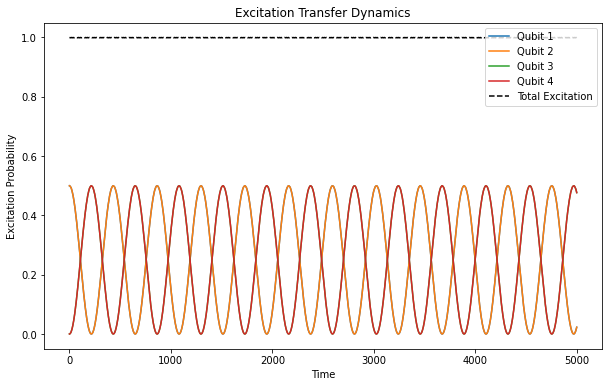

In [93]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 4 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian

    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] * sm_list[k] * 
                                         sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag()
                                         for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
                                         if i != j and i != k and j != k])


    H = H_qubits + H_field + H_interaction #+ non_res_loss_term

    return H, a, sm_list

#H, a, sm_list = setup_system(omega_q=5.0, omega_f=1.0, g=0.05, gamma=0.00002)
#H, a, sm_list = setup_system(omega_q=25.0, omega_f=0.25, g=0.1, gamma=0.00001)
H, a, sm_list = setup_system(omega_q=25.0, omega_f=0.25, g=0.3, gamma=0.00001)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_1000 + state_0100).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# Time evolution
times = np.linspace(0, 5000, 20000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

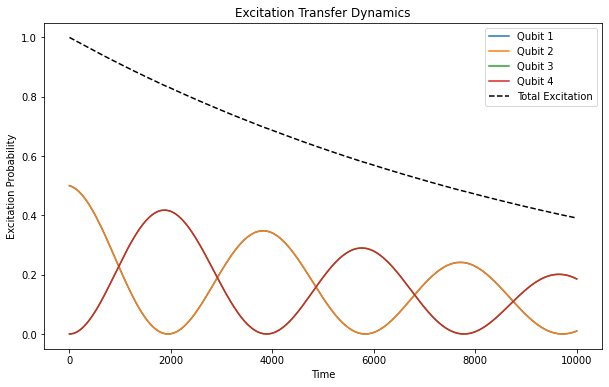

In [95]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 4 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian

    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] * sm_list[k] * 
                                         sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag()
                                         for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
                                         if i != j and i != k and j != k])


    H = H_qubits + H_field + H_interaction + non_res_loss_term

    return H, a, sm_list

#H, a, sm_list = setup_system(omega_q=5.0, omega_f=1.0, g=0.05, gamma=0.00002)
H, a, sm_list = setup_system(omega_q=25.0, omega_f=0.25, g=0.1, gamma=0.00001)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_1000 + state_0100).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# Time evolution
times = np.linspace(0, 10000, 20000)  # Adjust time values as needed

opts = Options(normalize_output=False)
#opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

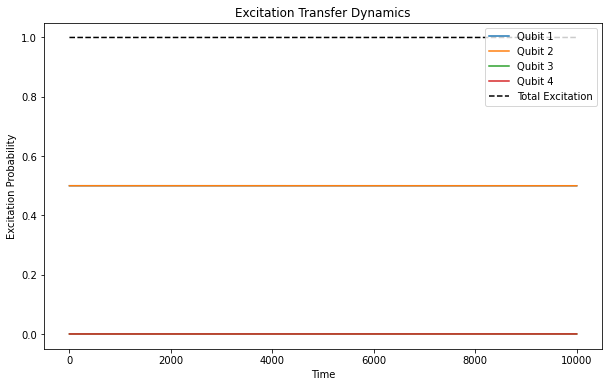

In [106]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 4 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian

    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] * sm_list[k] * 
                                         sm_list[i].dag() * sm_list[j].dag() * sm_list[k].dag()
                                         for i in range(num_qubits) for j in range(num_qubits) for k in range(num_qubits) 
                                         if i != j and i != k and j != k])


    H = H_qubits + H_field + H_interaction #+ non_res_loss_term

    return H, a, sm_list

#H, a, sm_list = setup_system(omega_q=5.0, omega_f=1.0, g=0.05, gamma=0.00002)
H, a, sm_list = setup_system(omega_q=2.50, omega_f=1.00, g=0.001, gamma=0.00001)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_1000 + state_0100).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# Time evolution
times = np.linspace(0, 10000, 10000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.003 0.    0.003 0.    0.    0.   ]
 [0.    0.003 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.003 0.   ]
 [0.    0.003 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.003 0.   ]
 [0.    0.    0.    0.003 0.    0.003 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]]
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]


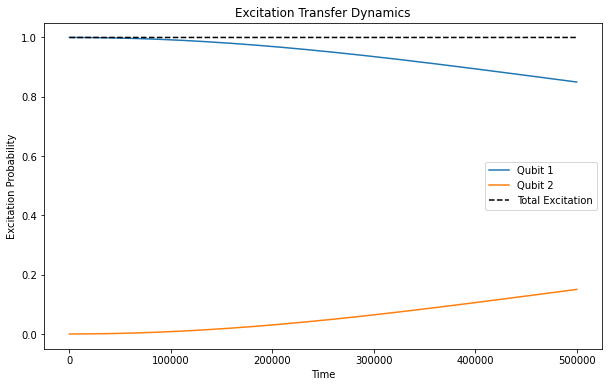

In [158]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 2 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    #print(sm_list)
    
    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian

    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] *
                                         sm_list[i].dag() * sm_list[j].dag() 
                                         for i in range(num_qubits) for j in range(num_qubits) 
                                         if i != j])


    H = H_qubits + H_field + H_interaction + non_res_loss_term
    H = H_interaction

    return H, a, sm_list


H, a, sm_list = setup_system(omega_q=1.0, omega_f=0.01, g=0.003, gamma=10.0)

print(H)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
#state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
#state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)
state_10 = tensor(qubit_1, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_10).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

print(combined_state)

# Time evolution
times = np.linspace(0, 500000, 20000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
#result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

$$H = \sum_{i=1}^{2} \omega_q \, \sigma_{+}^{(i)} \sigma_{-}^{(i)} + \omega_f \, a^{\dagger} a + g \sum_{i=1}^{2} (\sigma_{+}^{(i)} + \sigma_{-}^{(i)}) (a + a^{\dagger}) - 0.5i \gamma \sum_{i \neq j} \sigma_{-}^{(i)} \sigma_{-}^{(j)} \sigma_{+}^{(i)} \sigma_{+}^{(j)}$$ 

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


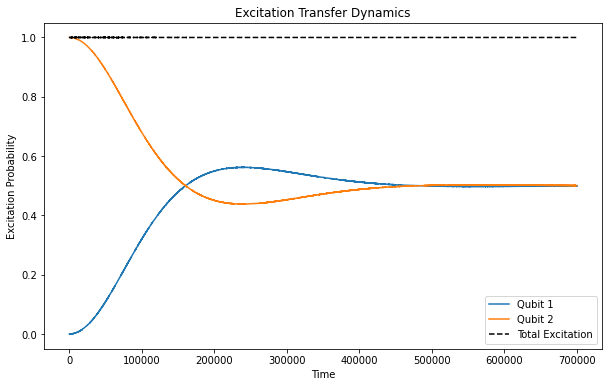

In [4]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 2 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    #print(sm_list)
    
    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian


    H_interaction_SB = sum([g * (sm_list[i].dag() + sm_list[i]) * (a + a.dag()) for i in range(num_qubits)])
    
    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] *
                                         sm_list[i].dag() * sm_list[j].dag() 
                                         for i in range(num_qubits) for j in range(num_qubits) 
                                         if i != j])


    H = H_qubits + H_field + H_interaction_SB + non_res_loss_term
    #H = H_interaction_SB

    return H, a, sm_list


H, a, sm_list = setup_system(omega_q=10.0, omega_f=0.1, g=0.01, gamma=10.0) #500

#print(H)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = basis(N_bosons, 0) # fock

print(boson_vacuum)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
#state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
#state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)
state_10 = tensor(qubit_1, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_10).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(boson_vacuum,superposition_state)

#print(combined_state)

# Time evolution
times = np.linspace(0, 700000, 3000000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

In [207]:
from itertools import product
N_bosons

def make_braket_labels(list_of_states):
    """
    Creates 2 lists of strings to be used in labels for plot when bras and kets are required.
    
    See https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/04-spin-boson-model.ipynb#4.3---Structure-of-the-Hamiltonian for where this function was first created.
    
    Parameters
    ----------
    list_of_states : list of strings, or list of tuples containing strings
    
    Returns
    -------
    bra_labels : list of strings
    ket_labels : list of strings
    
    Examples
    --------
    >>> bra_labels, ket_labels = make_braket_labels([("+","+"), ("-","+")])
    
    """
    bra_labels = ["$\langle$"+', '.join(map(str,n))+" |" for n in list_of_states]
    ket_labels = ["| "+', '.join(map(str,n))+"$\\rangle$" for n in list_of_states]
    return bra_labels, ket_labels

In [287]:
# map from QuTiP number states to |n,±> states
possible_ns = range(0, N_bosons)
possible_ms = ["+","-"]
nmm_list = [(n,m1,m2) for (n,m1,m2) in product(possible_ns, possible_ms, possible_ms)]
nmm_list
bra_labels, ket_labels = make_braket_labels(nmm_list)

H

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.00e+00-100.j 0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j
  0.00e+00  +0.j 1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 1.00e-01-100.j 1.00e-02  +0.j 0.00e+00  +0.j
  1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 1.00e-02  +0.j 1.00e+01  +0.j 0.00e+00  +0.j
  0.00e+00  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j]
 [1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 1.01e+01  +0.j
  0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j
  1.00e+01  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j]
 [1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 0.00e+00  +0.j
  0.00e+00  +0.j 1.01e+01  +0.j 1.00e-02  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j
  0.00e+00  +0.j 1.00e-02  +0.j 2.00e+01  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 0.00e

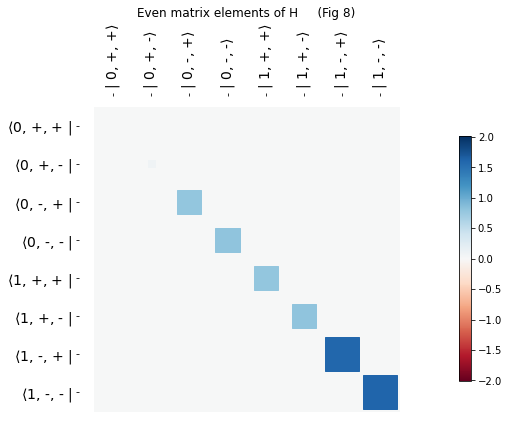

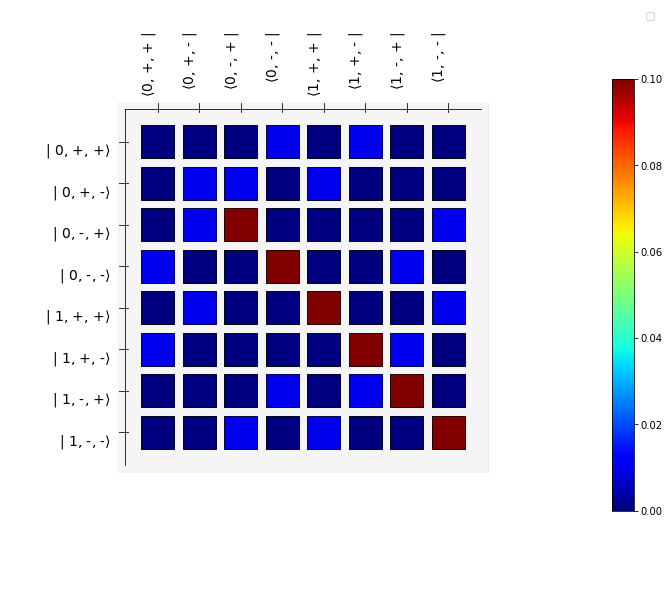

list

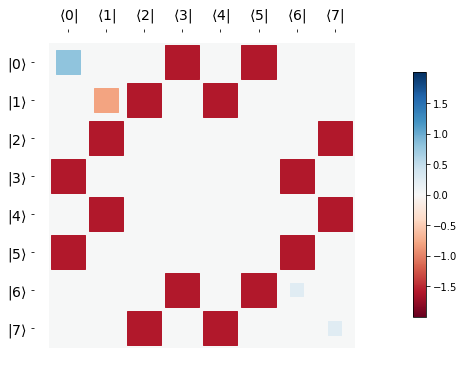

In [288]:
from qutip import hinton
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Using the previously defined setup_delocalized_system function to create the Hamiltonian
H, a, sm_list = setup_system(omega_q=1.0, omega_f=0.01, g=0.01, gamma=0.1)

# Creating a Hinton diagram for the Hamiltonian
#fig, ax = plt.subplots()
#hinton(H, ax=ax)
#ax.tick_params(axis='x',labelrotation=90,)
#ax.set_title("Hinton Diagram of the Hamiltonian")

f, ax = hinton(H, xlabels=ket_labels, ylabels=bra_labels)
ax.tick_params(axis='x',labelrotation=90,)
ax.set_title("Even matrix elements of H     (Fig 8)");
plt.show()


# Create a custom colormap (e.g., green to red, skipping blue)
colors = [(0, 1, 0), (1, 1, 0), (1, 0, 0)]  # Green to Yellow to Red
n_bins = 100  # Number of bins in the colormap
cmap_name = 'custom_cmap'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create the histogram with the custom colormap
#fig, ax = matrix_histogram(H, limits=[0, 0.1], color=custom_cmap)

fig, ax = matrix_histogram(H,limits=[0,0.1])
#ax.view_init(azim=-55, elev=45)
ax.view_init(azim=0, elev=90)

# Setting custom tick labels with adjusted positioning
#ax.set_xticks(range(len(ket_labels)))
ax.set_xticklabels(ket_labels, rotation=0, ha='right')

#ax.set_yticks(range(len(bra_labels)))
ax.set_yticklabels(bra_labels, rotation=90, ha='right')

ax.yaxis.set_tick_params(pad=55) 
#ax.xaxis.set_tick_params(pad=35) 

# Adjust the legend position to avoid overlap
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

# Adjust figure size for better spacing and visibility
fig.set_size_inches(10, 8)

plt.show()

import numpy as np
from qutip import Qobj, hinton

# Example Hamiltonian (replace this with your Hamiltonian)
#H = Qobj(np.array([[10, 0.01], [0.01, 10]]))

# Function to apply logarithmic scaling
def log_scale_matrix(mat, epsilon=1e-10):
    # Add epsilon to avoid log(0) and log of negative values
    abs_mat = np.abs(mat.full()) + epsilon
    # Apply logarithmic scaling
    log_mat = np.sign(mat.full()) * np.log10(abs_mat)
    return Qobj(log_mat)

# Applying the transformation
H_log_scaled = log_scale_matrix(H)

# Plotting the Hinton diagram
hinton(H_log_scaled)
H_log_scaled

type(ket_labels)

/Users/matt/anaconda3/envs/anaconda/lib/python3.11/site-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


/Users/matt/anaconda3/envs/anaconda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


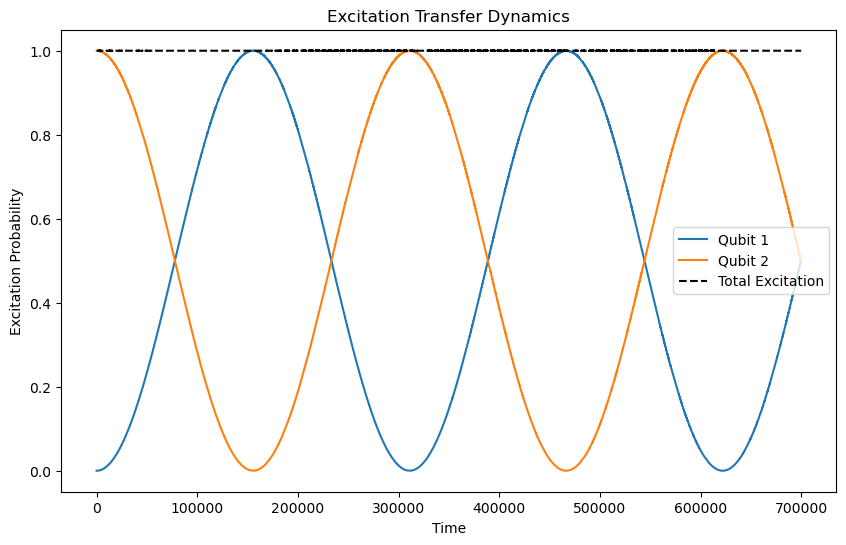

In [1]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 2 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    #print(sm_list)
    
    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian


    H_interaction_SB = sum([g * (sm_list[i].dag() + sm_list[i]) * (a + a.dag()) for i in range(num_qubits)])
    
    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] *
                                         sm_list[i].dag() * sm_list[j].dag() 
                                         for i in range(num_qubits) for j in range(num_qubits) 
                                         if i != j])


    H = H_qubits + H_field + H_interaction + non_res_loss_term
    #H = H_interaction_SB

    return H, a, sm_list


H, a, sm_list = setup_system(omega_q=10.0, omega_f=0.1, g=0.01, gamma=0.0)

#print(H)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = basis(N_bosons, 0) # fock

print(boson_vacuum)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
#state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
#state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)
state_10 = tensor(qubit_1, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_10).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(boson_vacuum,superposition_state)

#print(combined_state)

# Time evolution
times = np.linspace(0, 700000, 2000000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

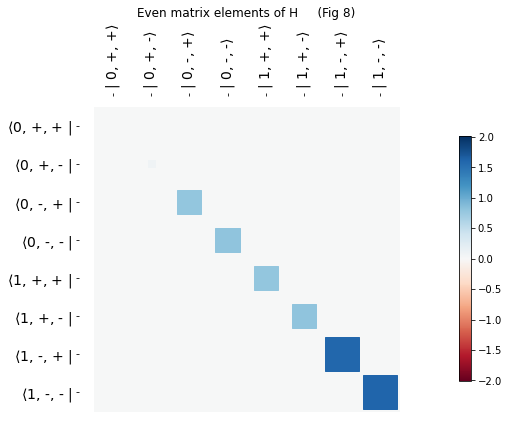

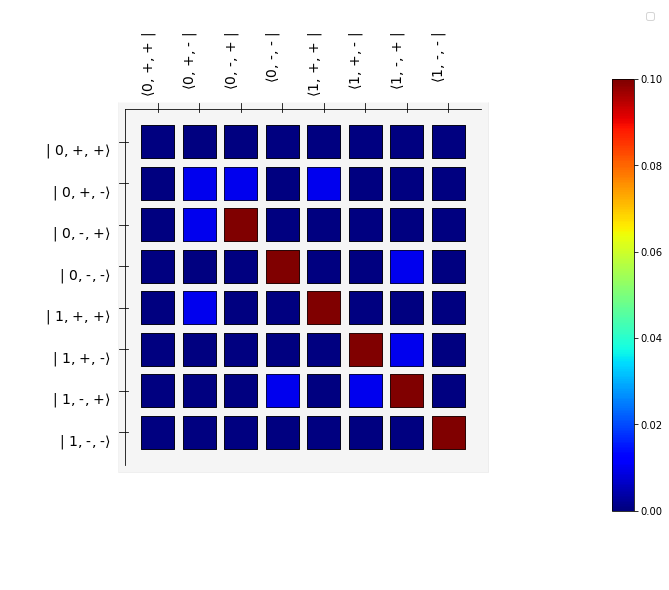

list

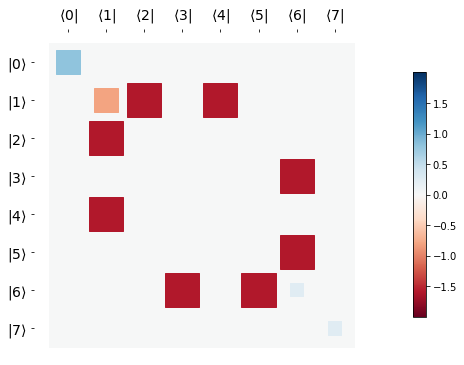

In [279]:
from qutip import hinton
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Using the previously defined setup_delocalized_system function to create the Hamiltonian
H, a, sm_list = setup_system(omega_q=1.0, omega_f=0.01, g=0.01, gamma=0.1)

# Creating a Hinton diagram for the Hamiltonian
#fig, ax = plt.subplots()
#hinton(H, ax=ax)
#ax.tick_params(axis='x',labelrotation=90,)
#ax.set_title("Hinton Diagram of the Hamiltonian")

f, ax = hinton(H, xlabels=ket_labels, ylabels=bra_labels)
ax.tick_params(axis='x',labelrotation=90,)
ax.set_title("Even matrix elements of H     (Fig 8)");
plt.show()


# Create a custom colormap (e.g., green to red, skipping blue)
colors = [(0, 1, 0), (1, 1, 0), (1, 0, 0)]  # Green to Yellow to Red
n_bins = 100  # Number of bins in the colormap
cmap_name = 'custom_cmap'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create the histogram with the custom colormap
#fig, ax = matrix_histogram(H, limits=[0, 0.1], color=custom_cmap)

fig, ax = matrix_histogram(H,limits=[0,0.1])
#ax.view_init(azim=-55, elev=45)
ax.view_init(azim=0, elev=90)

# Setting custom tick labels with adjusted positioning
#ax.set_xticks(range(len(ket_labels)))
ax.set_xticklabels(ket_labels, rotation=0, ha='right')

#ax.set_yticks(range(len(bra_labels)))
ax.set_yticklabels(bra_labels, rotation=90, ha='right')

ax.yaxis.set_tick_params(pad=55) 
#ax.xaxis.set_tick_params(pad=35) 

# Adjust the legend position to avoid overlap
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

# Adjust figure size for better spacing and visibility
fig.set_size_inches(10, 8)

plt.show()

import numpy as np
from qutip import Qobj, hinton

# Example Hamiltonian (replace this with your Hamiltonian)
#H = Qobj(np.array([[10, 0.01], [0.01, 10]]))

# Function to apply logarithmic scaling
def log_scale_matrix(mat, epsilon=1e-10):
    # Add epsilon to avoid log(0) and log of negative values
    abs_mat = np.abs(mat.full()) + epsilon
    # Apply logarithmic scaling
    log_mat = np.sign(mat.full()) * np.log10(abs_mat)
    return Qobj(log_mat)

# Applying the transformation
H_log_scaled = log_scale_matrix(H)

# Plotting the Hinton diagram
hinton(H_log_scaled)
H_log_scaled

type(ket_labels)

$$H = \sum_{i=1}^{2} \omega_{q} \sigma_{+}^{i} \sigma_{-}^{i} + \omega_{f} a^{\dagger} a + g \sum_{i=1}^{2} (\sigma_{+}^{i} a + \sigma_{-}^{i} a^{\dagger})$$

$$H = \sum_{i=1}^{2} \omega_{q} \sigma_{+}^{i} \sigma_{-}^{i} + \omega_{f} a^{\dagger} a + g \sum_{i=1}^{2} ((\sigma_{+}^{i} + \sigma_{-}^{i})(a + a^{\dagger}))$$

$$H = \sum_{i=1}^{2} \omega_{q} \sigma_{+}^{i} \sigma_{-}^{i} + \omega_{f} a^{\dagger} a + g \sum_{i=1}^{2} ((\sigma_{+}^{i} + \sigma_{-}^{i})(a + a^{\dagger})) - \frac{i \gamma}{2} \sum_{i=1}^{2} \sum_{j=1, j \neq i}^{2} (\sigma_{-}^{i} \sigma_{-}^{j} \sigma_{+}^{i} \sigma_{+}^{j})$$


In [282]:
H

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.00e-01 1.00e-02 0.00e+00 1.00e-02 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.00e-02 1.00e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.01e+01 0.00e+00 0.00e+00 1.00e-02 0.00e+00]
 [0.00e+00 1.00e-02 0.00e+00 0.00e+00 1.00e+01 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.01e+01 1.00e-02 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.00e-02 0.00e+00 1.00e-02 2.00e+01 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.01e+01]]

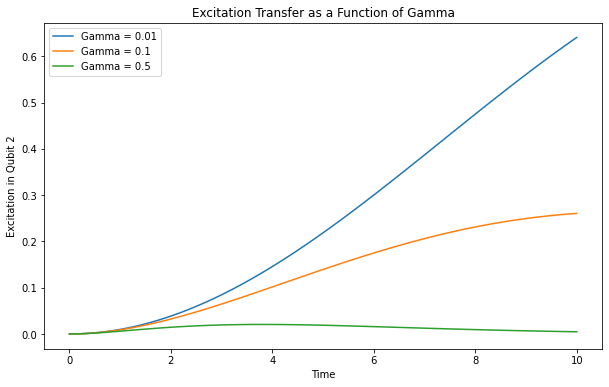

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def run_simulation(gamma):
    # System parameters
    omega_q = 1.0      # Energy of the qubits
    g = 0.1            # Coupling strength

    # Operators for two qubits
    sm1 = tensor(destroy(2), qeye(2))  # Lowering operator for qubit 1
    sm2 = tensor(qeye(2), destroy(2))  # Lowering operator for qubit 2

    # Hamiltonian
    H = omega_q * (sm1.dag() * sm1 + sm2.dag() * sm2) + g * (sm1.dag() * sm2 + sm1 * sm2.dag())

    # Initial state (qubit 1 is excited)
    psi0 = tensor(basis(2, 1), basis(2, 0))

    # Collapse operators
    c_ops = [np.sqrt(gamma) * sm1, np.sqrt(gamma) * sm2]  # Loss for each qubit

    # Time evolution
    times = np.linspace(0, 10, 100)
    result = mesolve(H, psi0, times, c_ops, [sm1.dag() * sm1, sm2.dag() * sm2])

    return times, result.expect[0], result.expect[1]

# Run the simulation for different values of gamma
gammas = [0.01, 0.1, 0.5]  # Different loss rates
plt.figure(figsize=(10, 6))

for gamma in gammas:
    times, excitation1, excitation2 = run_simulation(gamma)
    plt.plot(times, excitation2, label=f'Gamma = {gamma}')

plt.xlabel('Time')
plt.ylabel('Excitation in Qubit 2')
plt.title('Excitation Transfer as a Function of Gamma')
plt.legend()
plt.show()


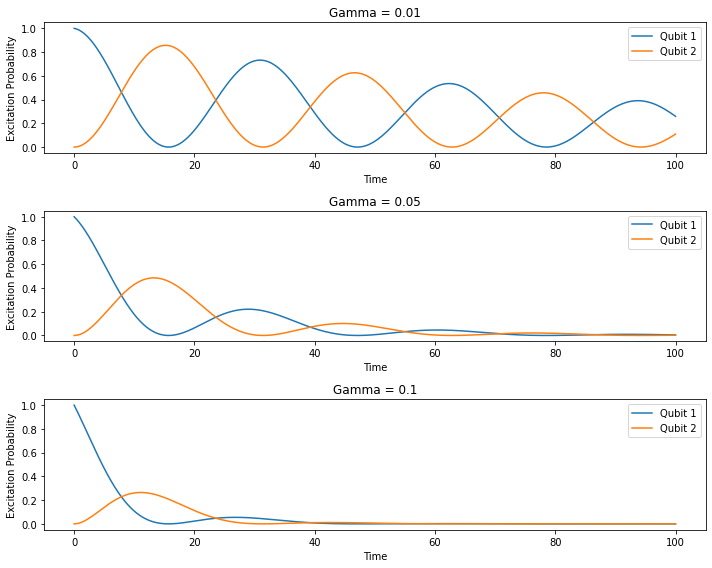

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def run_simulation(gamma):
    # System parameters
    omega_q = 1.0      # Energy of the qubits
    g = 0.1            # Coupling strength

    # Operators for two qubits
    sm1 = tensor(destroy(2), qeye(2))  # Lowering operator for qubit 1
    sm2 = tensor(qeye(2), destroy(2))  # Lowering operator for qubit 2

    # Hamiltonian
    H = omega_q * (sm1.dag() * sm1 + sm2.dag() * sm2) + g * (sm1.dag() * sm2 + sm1 * sm2.dag())

    # Initial state (qubit 1 is excited)
    psi0 = tensor(basis(2, 1), basis(2, 0))

    # Collapse operators
    c_ops = [np.sqrt(gamma) * sm1, np.sqrt(gamma) * sm2]  # Loss for each qubit

    # Time evolution
    times = np.linspace(0, 100, 1000)
    result = mesolve(H, psi0, times, c_ops, [sm1.dag() * sm1, sm2.dag() * sm2])

    return times, result.expect[0], result.expect[1]

# Run the simulation for different values of gamma
gammas = [0.01, 0.05, 0.1]  # Different loss rates
fig, axs = plt.subplots(len(gammas), 1, figsize=(10, 8))

for i, gamma in enumerate(gammas):
    times, excitation1, excitation2 = run_simulation(gamma)
    axs[i].plot(times, excitation1, label='Qubit 1')
    axs[i].plot(times, excitation2, label='Qubit 2')
    axs[i].set_title(f'Gamma = {gamma}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Excitation Probability')
    axs[i].legend()

plt.tight_layout()
plt.show()


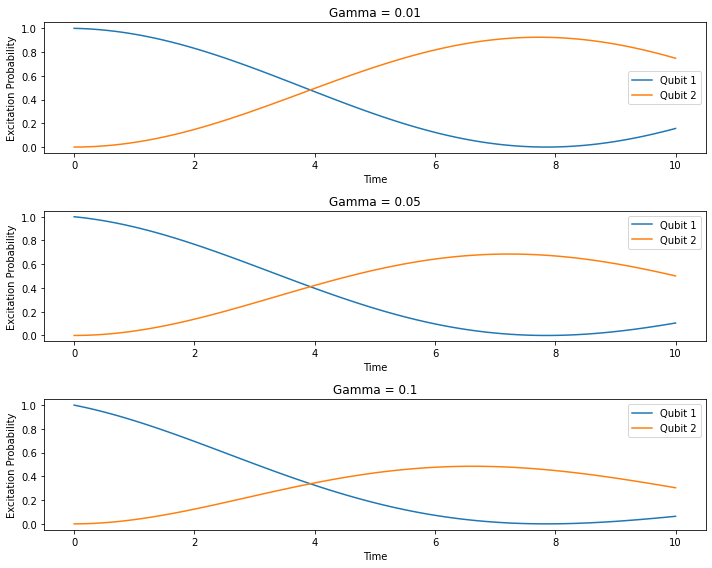

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def run_simulation(gamma, g):
    # System parameters
    omega_q = 1.0  # Energy of the qubits

    # Operators for two qubits
    sm1 = tensor(destroy(2), qeye(2))  # Lowering operator for qubit 1
    sm2 = tensor(qeye(2), destroy(2))  # Lowering operator for qubit 2

    # Hamiltonian
    H = omega_q * (sm1.dag() * sm1 + sm2.dag() * sm2) + g * (sm1.dag() * sm2 + sm1 * sm2.dag())

    # Initial state (qubit 1 is excited)
    psi0 = tensor(basis(2, 1), basis(2, 0))

    # Collapse operators
    c_ops = [np.sqrt(gamma) * sm1, np.sqrt(gamma) * sm2]  # Loss for each qubit

    # Time evolution
    times = np.linspace(0, 10, 100)
    result = mesolve(H, psi0, times, c_ops, [sm1.dag() * sm1, sm2.dag() * sm2])

    return times, result.expect[0], result.expect[1]

# Try adjusting the coupling strength
g = 0.2  # Adjust as needed

# Run the simulation for different values of gamma
gammas = [0.01, 0.05, 0.1]  # Different loss rates
fig, axs = plt.subplots(len(gammas), 1, figsize=(10, 8))

for i, gamma in enumerate(gammas):
    times, excitation1, excitation2 = run_simulation(gamma, g)
    axs[i].plot(times, excitation1, label='Qubit 1')
    axs[i].plot(times, excitation2, label='Qubit 2')
    axs[i].set_title(f'Gamma = {gamma}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Excitation Probability')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [159]:
from qutip import tensor, destroy, qeye, basis

num_qubits = 2
omega_q = 1.0  # Qubit frequency
omega_f = 1.0  # Field frequency
g = 0.1        # Coupling strength
boson_states = 2  # Number of states in bosonic mode

# Operators for the qubits
sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
           for i in range(num_qubits)]

# Operator for the bosonic field
a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

# Spin-Boson Hamiltonian
H_qubits_SB = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])
H_field_SB = omega_f * a.dag() * a
H_interaction_SB = sum([g * (sm_list[i].dag() + sm_list[i]) * (a + a.dag()) for i in range(num_qubits)])
H_SB = H_qubits_SB + H_field_SB + H_interaction_SB
